In [124]:
import netCDF4 as nc
import numpy as np
with nc.Dataset('/Users/mgrecu/AirborneData/IMPACTS2023_HIWRAP_KU_L1B_Rev-_20230115.h5') as f:
    print(f)
    time_Ku=f["Time/Data/TimeUTC"][:]
    #return None
    #dbz_ka=f["Products/Ka/Combined/Data/dBZe"][n1:n2,:]
    n1=time_Ku.shape[0]//2
    n2=n1*2
    n1=n1+8000
    n2=n1+2000
    dbz_ku=f["Products/Combined/Data/dBZe"][n1:n2,:]
    ldr=f["Products/Combined/Data/LDR"][n1:n2,:]
    lon=f["Navigation/Data/Longitude"][n1:n2]
    lat=f["Navigation/Data/Latitude"][n1:n2]
    height=f["Navigation/Data/Height"][n1:n2]
    vdop=f["Products/Combined/Data/Velocity_corrected"][n1:n2,:]
    time_Ku=time_Ku[n1:n2]
    radar_range=f["Products/Information/Range"][:]
    print(f['Time/Information/TimeUTC_description'][:])

with nc.Dataset('/Users/mgrecu/AirborneData/IMPACTS2023_HIWRAP_KA_L1B_Rev-_20230115.h5') as f:
    #print(f)
    time_Ka=f["Time/Data/TimeUTC"][:]
    a=np.nonzero((time_Ka-time_Ku[0]+10)*(time_Ka-time_Ku[-1]-10)<=0)
    n1=a[0][0]
    n2=a[0][-1]
    time_Ka=time_Ka[n1:n2]
    dbz_ka=f["Products/Combined/Data/dBZe"][n1:n2,:]
    lon_ka=f["Navigation/Data/Longitude"][n1:n2]
    lat_ka=f["Navigation/Data/Latitude"][n1:n2]
    height_ka=f["Navigation/Data/Height"][n1:n2]
    ldr_ka=f["Products/Combined/Data/LDR"][n1:n2,:]
    radar_range_ka=f["Products/Information/Range"][:]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: Information, Navigation, Products, Time
['UTC profile time in Unix Epoch format (seconds since 1970). Obtained from aircraft NTP']


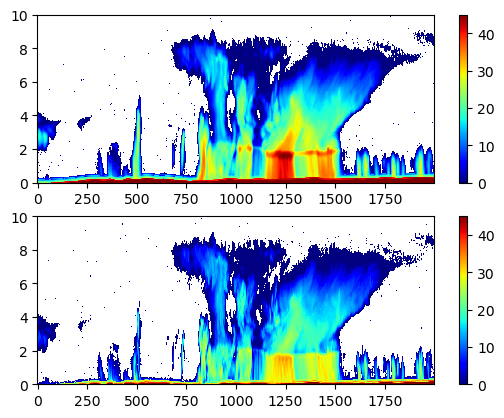

In [19]:
import matplotlib.pyplot as plt
import numpy as np
havg=np.mean(height)
h=havg-radar_range
plt.subplot(211)
plt.pcolormesh(range(2000),h/1e3,dbz_ku[:,:].T,vmin=0,vmax=45,cmap='jet')
plt.ylim(0,10)
plt.colorbar()
#plt.figure()
#plt.plot(height)

zKaL=[]
for t1 in time_Ku:
    ind=np.argmin(np.abs(time_Ka-t1))
    zKaL.append(dbz_ka[ind,:])

havg_ka=np.mean(height_ka)
h_ka=havg_ka-radar_range_ka
plt.subplot(212)
plt.pcolormesh(range(2000),h_ka/1e3,np.array(zKaL).T,vmin=0,vmax=45,cmap='jet')
plt.ylim(0,10.)
plt.colorbar()

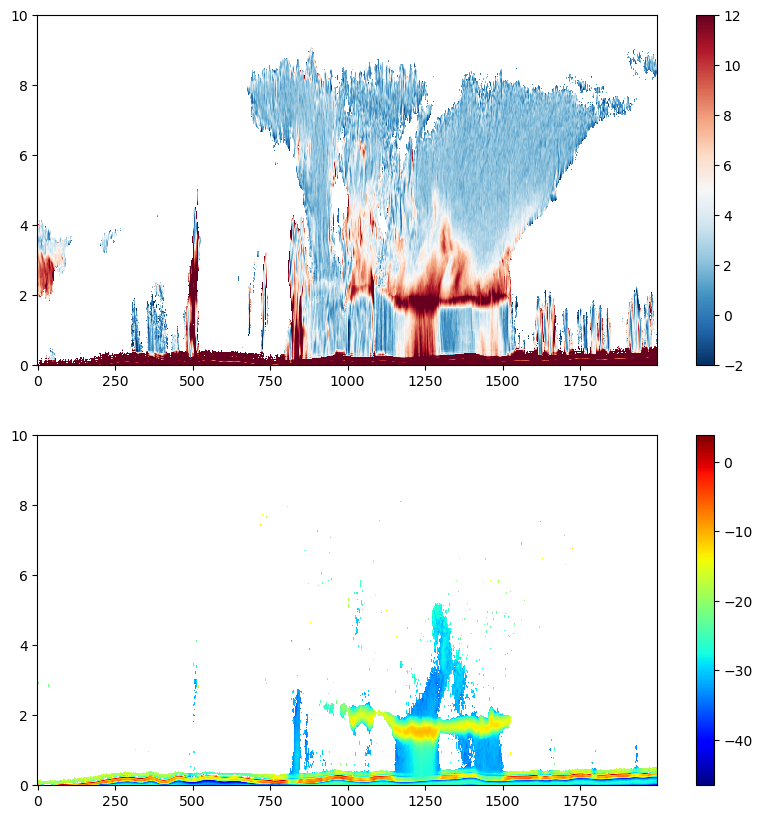

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.pcolormesh(range(2000),h/1e3,(dbz_ku[:,:]-zKaL).T,vmin=-2,vmax=12,cmap='RdBu_r')
plt.ylim(0,10)
plt.colorbar()
plt.subplot(212)
plt.pcolormesh(range(2000),h_ka/1e3,(ldr).T,cmap='jet')
plt.ylim(0,10)
plt.colorbar()

(2039, 609)
(609,)
2039


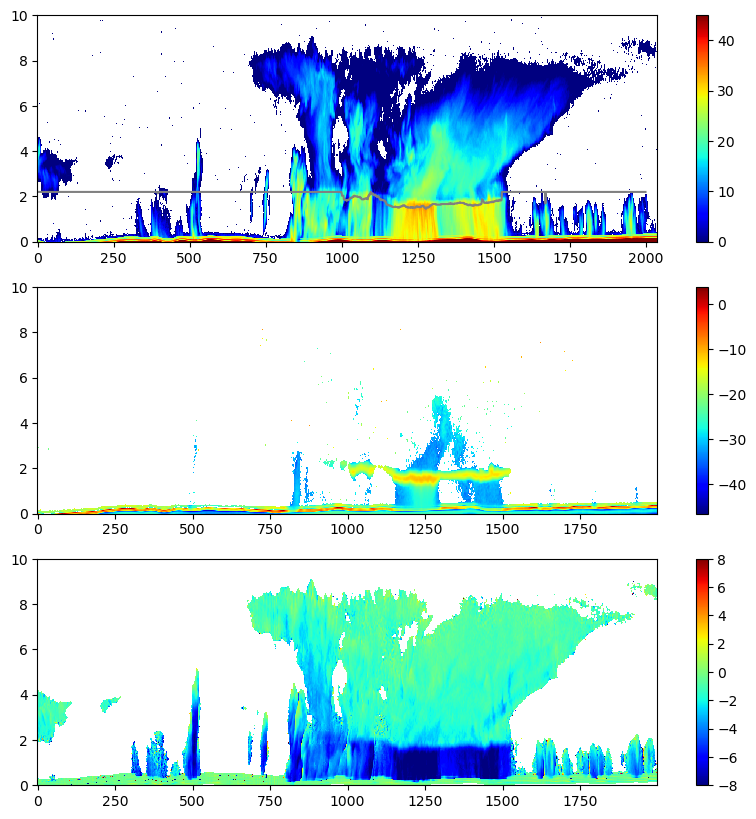

In [151]:
havg_ka=np.mean(height_ka)
h_ka=havg_ka-radar_range_ka
n_ka=dbz_ka.shape[0]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
print(dbz_ka.shape)
print(h_ka.shape)
print(n_ka)
plt.subplot(311)
plt.pcolormesh(range(n_ka),h_ka/1e3,dbz_ka[:,:].T,vmin=0,vmax=45,cmap='jet')
ml_height=[2.2 for i in range(n_ka)]
a=np.nonzero((h_ka/1e3-2.2)*(h_ka/1e3-1.2)<0)
ml_heigtKu=[2.2 for i in range(2000)]
zKu1L=[]
zKa1L=[]
iend=a[0][0]
lonL=[]
latL=[]
timeL=[]
for i in range(2000):
    b=np.nonzero(ldr[i,a[0]]==ldr[i,a[0]])
    if len(b[0])>0:
        ind=np.argmax(ldr[i,a[0][b]])
    
    
        if ldr[i,a[0][b]][ind]>-20:
            ml_heigtKu[i]=h_ka[a][b][ind]/1e3
        if i>750 and i<1850:
            iend=a[0][b][ind]
            istart=iend-300
            zKu1L.append(dbz_ku[i,istart:iend])
            zKa1L.append(zKaL[i][istart:iend])
            lonL.append(lon[i])
            latL.append(lat[i])
            timeL.append(time_Ku[i])
    else:
        if i>750 and i<1850:
           
            istart=iend-300
            zKu1L.append(dbz_ku[i,istart:iend])
            zKa1L.append(zKaL[i][istart:iend])
            lonL.append(lon[i])
            latL.append(lat[i])
            timeL.append(time_Ku[i])
#plt.plot(range(n_ka),ml_height,'k')
plt.plot(range(2000),ml_heigtKu,'gray')
plt.ylim(0,10)
plt.colorbar()
plt.subplot(312)
plt.pcolormesh(range(2000),h_ka/1e3,ldr[:,:].T,cmap='jet')
#plt.plot(range(n_ka),[2.2 for i in range(n_ka)],'k')
plt.ylim(0,10)
plt.colorbar()
plt.subplot(313)
plt.pcolormesh(range(2000),h/1e3,vdop[:,:].T,cmap='jet',vmin=-8,vmax=8)    
plt.ylim(0,10)
plt.colorbar()



26.25
393.75


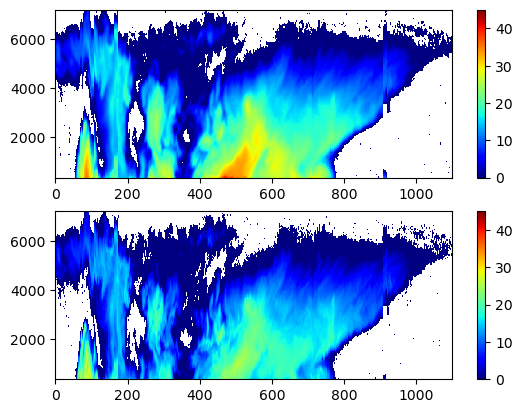

In [102]:
plt.subplot(211)
plt.pcolormesh(range(len(zKu1L)),radar_range[:300]-radar_range[0],np.array(zKu1L)[:,::-1].T,vmin=0,vmax=45,cmap='jet')
plt.ylim(350,7200)
print(radar_range[1]-radar_range[0])
print(26.25*15)
plt.colorbar()
plt.subplot(212)
plt.pcolormesh(range(len(zKa1L)),radar_range[:300]-radar_range[0],np.array(zKa1L)[:,::-1].T,vmin=0,vmax=45,cmap='jet')
plt.ylim(350,7200)
plt.colorbar()

import xarray as xr
zKuX=xr.DataArray(np.array(zKu1L),dims=['time','range'])
zKaX=xr.DataArray(np.array(zKa1L),dims=['time','range'])
rangeX=radar_range[:300]
ds=xr.Dataset({'zKu':zKuX,'zKa':zKaX,'range':rangeX})
encoding = {'zKu': {'zlib': True, 'complevel': 5},
            'zKa': {'zlib': True, 'complevel': 5},
            'range': {'zlib': True, 'complevel': 5}}
ds.to_netcdf('zKu_zKa.nc')

In [161]:
fh=nc.Dataset("simulatedZ_impacts2020_Kuo.nc");
vars="Nw,dm,iwc,iwc_ncar,tempC,zKu,attKu,kextKu,kscatKu,gKu,Ka,attKa,kextKa,kscatKa,gKa,zW,attW,kextW,kscatW,gW"
psd_Data=fh.variables['psd_Data'][:]
Nw=psd_Data[:,0]
dm=psd_Data[:,1]
iwc=psd_Data[:,2]
tempC=psd_Data[:,4]
zKuDB=psd_Data[:,5]
attKuDB=psd_Data[:,6]
zKaDB=psd_Data[:,10]
attKaDB=psd_Data[:,11]
x=[zKuDB+np.random.randn(zKuDB.shape[0])*0.5,zKaDB+np.random.randn(zKaDB.shape[0])*2]
y=[np.log10(1+iwc/1e-2),dm,attKuDB,attKaDB]
x=np.array(x).T
y=np.array(y).T
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [162]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=45)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=45)

In [164]:
zKu1L=np.array(zKu1L)
zKa1L=np.array(zKa1L)
a=np.nonzero((zKu1L==zKu1L)*(zKa1L==zKa1L))
x=np.array([zKu1L[a],zKa1L[a]]).T
print(x.shape)
yout=knn.predict(x)

(200200, 2)


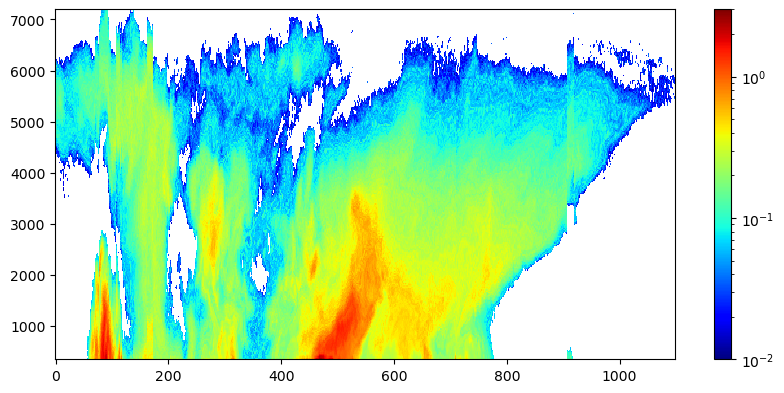

In [165]:
from matplotlib.colors import LogNorm
dm=np.zeros_like(zKu1L)
iwc=np.zeros_like(zKu1L)
iwc[a]=(np.power(10,yout[:,0])-1)*1e-2
dm[a]=yout[:,1]
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.pcolormesh(range(len(zKu1L)),radar_range[:300]-radar_range[0],iwc[:,::-1].T,cmap='jet',norm=LogNorm(vmin=1e-2,vmax=3))
plt.ylim(350,7200)
plt.colorbar()

17.82847222222222
945
[[1.         0.31147475]
 [0.31147475 1.        ]]


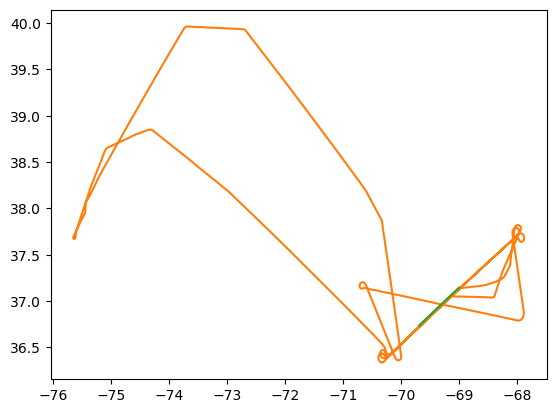

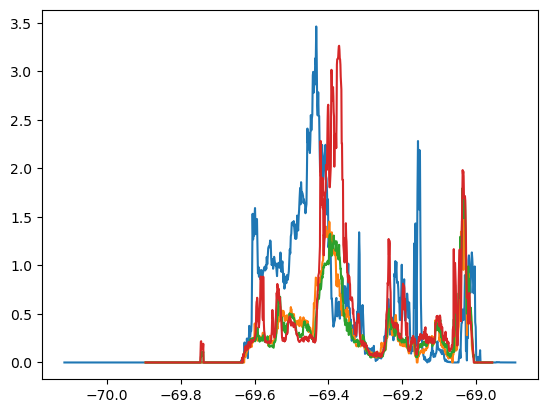

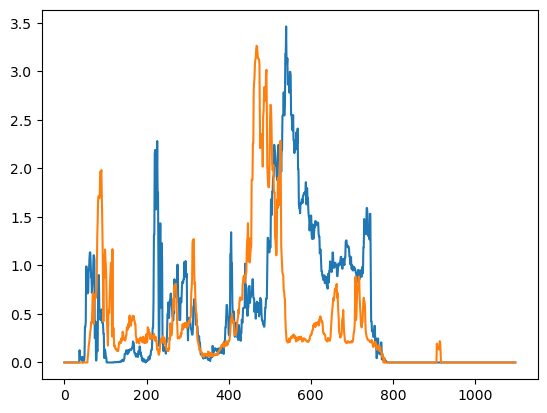

In [174]:
time_Ku
import datetime
dt=datetime.datetime(2023,1,15,0,0,0)-datetime.datetime(1970,1,1,0,0,0)
t0=dt.total_seconds()
print((time_Ku[0]-t0)/3600)
#print(fh[])
with nc.Dataset('IMPACTS_MergedHorizontal-P3_20230115_sizedistributions_v01.nc') as f:
    lat_ncar=f['LAT'][:]
    lon_ncar=f['LON'][:]
    alt_ncar=f['GALT'][:]
    time_ncar=f['time'][:]
    IWC=f['IWC'][:]

a_ncar=np.nonzero((time_ncar-(time_Ku[700]-t0))*(time_ncar-(time_Ku[1990]+300-t0))<=0)
print(len(a_ncar[0]))
plt.plot(lon_ncar[a_ncar],lat_ncar[a_ncar])
plt.plot(lon_ncar,lat_ncar)
#plt.plot(alt_ncar[a_ncar])
plt.plot(lon[800:1600],lat[800:1600])
plt.figure()
plt.plot(lon_ncar[a_ncar],IWC[a_ncar])
plt.plot(lonL,iwc[:,-30])
plt.plot(lonL,iwc[:,-20])
plt.plot(lonL,iwc[:,-12])
iwcL=[]
dtL=[]
for irec,iwc1 in enumerate(iwc[:,-12]):
    ind=np.argmin(np.abs(lon_ncar[a_ncar]-lonL[irec])+np.abs(lat_ncar[a_ncar]-latL[irec]))
    iwcL.append(IWC[a_ncar][ind])
    dtL.append(time_ncar[a_ncar][ind]-(timeL[irec]-t0))
print(np.corrcoef(iwcL,iwc[:,-12]))
plt.figure()
plt.plot(iwcL)
plt.plot(iwc[:,-12])

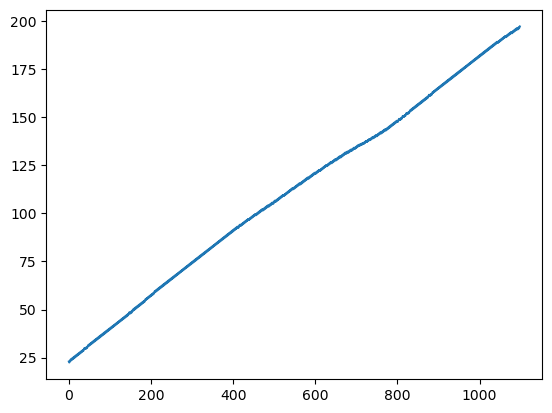

In [172]:
plt.plot(dtL)

In [3]:
with nc.Dataset('profiles137/saf137.nc') as f:
    qv=f['hum'][:]
    temp=f['temp'][:]
    dz=f['dz'][:]
    p=f['pap'][:]
    rain=f['rain'][:]*3600 # convert from kg/m^2/s to mm/h
    snow=f['snow'][:]*3600 # convert from kg/m^2/s to mm/h
rho=p/(287.05*temp)

58


(0.0, 10000.0)

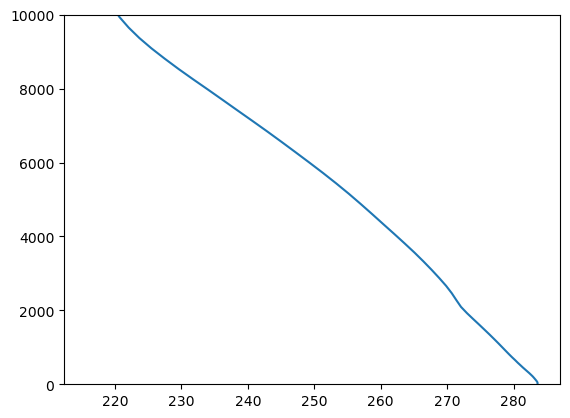

In [12]:
iprof=0
ecmwf_temp=[]
ecmwf_qv=[]
ecmwf_rho=[]
ecmwf_p=[]
ecmwf_rain=[]
ecmwf_snow=[]
ecmwf_h=[]
for i,temp1 in enumerate(temp):
    temp1_=temp1[::-1]
    qv1=qv[i,::-1]
    h1=np.cumsum(dz[i,::-1])
    p1=p[::-1]
    rho1=rho[i,::-1]
    rain1=rain[i][::-1]
    snow1=snow[i][::-1]
    a=np.nonzero(temp1_<273.15)
    if abs(h1[a[0][0]]-2000)<100:
        #print(i,h1[a[0][0]],temp1_[a[0][0]],qv1[a[0][0]],rho1[a[0][0]],rain1[a[0][0]],snow1[a[0][0]])
        ecmwf_temp.append(temp1_[:])
        ecmwf_qv.append(qv1[:])
        ecmwf_rho.append(rho1[:])
        ecmwf_p.append(p1[:])
        ecmwf_rain.append(rain1[:])
        ecmwf_snow.append(snow1[:])
        ecmwf_h.append(h1[:])
        iprof+=1
print(iprof)
ecmwf_temp=np.array(ecmwf_temp)
ecmwf_qv=np.array(ecmwf_qv)
ecmwf_rho=np.array(ecmwf_rho)
ecmwf_p=np.array(ecmwf_p)
ecmwf_rain=np.array(ecmwf_rain)
ecmwf_snow=np.array(ecmwf_snow)
ecmwf_h=np.array(ecmwf_h)
plt.plot(ecmwf_temp.mean(axis=0),ecmwf_h.mean(axis=0))
plt.ylim(0,10000)

(0.0, 4.0)

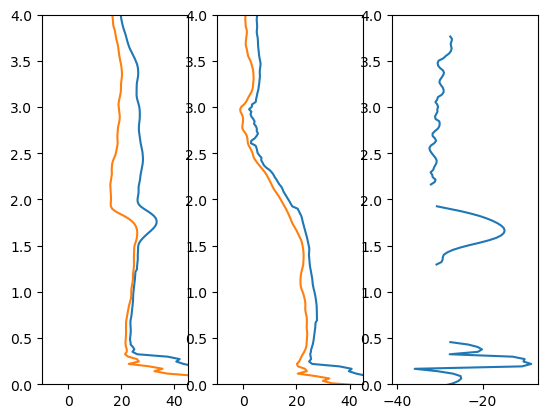

In [40]:
zKaL=np.array(zKaL)
plt.subplot(131)
plt.plot(dbz_ku[1350,:],h/1e3)
plt.plot(zKaL[1350,:],h_ka/1e3)
plt.ylim(0,4.)
plt.xlim(-10,45)
plt.subplot(132)
plt.plot(dbz_ku[890,:],h/1e3)
plt.plot(zKaL[890,:],h_ka/1e3)
plt.ylim(0,4.)
plt.xlim(-10,45)
plt.subplot(133)
plt.plot(ldr[1350,:],h/1e3)
plt.ylim(0,4)